# Module 12 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object

html = browser.html

soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
table_rows = soup.find_all('tr', class_='data-row')

table_header = soup.find_all('th')


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
mars_temps = []

# Loop through the scraped data to create a list of rows
#rows = table_rows.find('td')

for row in table_rows:
    data = row.find_all("td")
    strip_data = [td.text.strip() for td in data]    
    mars_temps.append(strip_data)

    
#Extract the header row:
headers = []

for header in table_header:
    strip_data2 = header.text.strip()    
    headers.append(strip_data2)

headers



['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_temps_df=pd.DataFrame(mars_temps, columns=headers)


In [8]:
# Confirm DataFrame was created successfully
mars_temps_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
print(mars_temps_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [10]:
# Change data types for data analysis
mars_temps_df[['terrestrial_date']] = mars_temps_df[['terrestrial_date']].astype('datetime64[ns]')
mars_temps_df[['sol', 'ls', 'month']] = mars_temps_df[['sol', 'ls', 'month']].astype('int64') 
mars_temps_df[['min_temp', 'pressure']] = mars_temps_df[['min_temp', 'pressure']].astype('float64')

In [11]:
# Confirm type changes were successful by examining data types again
print(mars_temps_df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [134]:
# 1. How many months are there on Mars?
answer= mars_temps_df['month'].max()


print(f"There are {answer} months on Mars as defined by the data presented.")

There are 12 months on Mars as defined by the data presented.


In [16]:
# 2. How many Martian days' worth of data are there?
answer2 = mars_temps_df['sol'].count()

print(f"There are {answer2} Martian days' worth of data")

There are 1867 Martian days' worth of data


In [88]:
# 3. What is the average low temperature by month?
ave_min = mars_temps_df.groupby('month')
ave_min['min_temp'].mean()


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

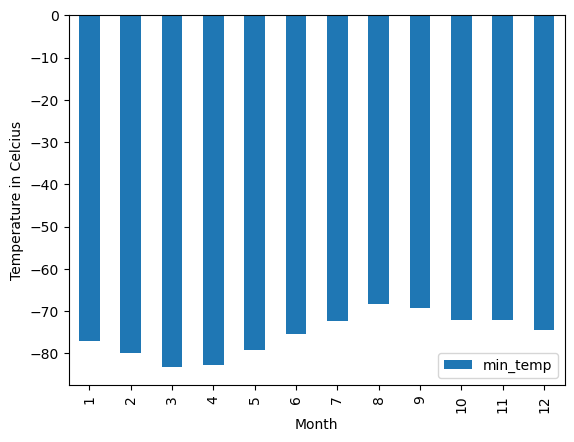

In [33]:
# Plot the average temperature by month
ave_low_temp = pd.DataFrame(ave_min['min_temp'].mean())
Temp_plot = ave_low_temp.plot.bar(xlabel = "Month", ylabel ="Temperature in Celcius") 

The coldest month in Curiosity's location is Month 3; the warmest is Month 8.


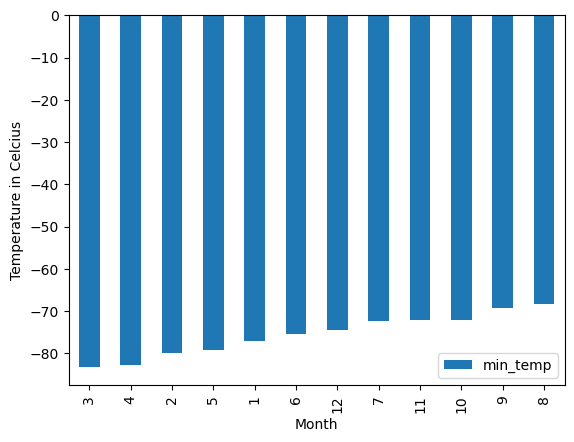

In [139]:
# Identify the coldest and hottest months in Curiosity's location
sort_by = ave_low_temp.sort_values('min_temp', ascending=True)
Sort_plot = sort_by.plot.bar(xlabel = "Month", ylabel = "Temperature in Celcius")
print(f"The coldest month in Curiosity's location is Month 3; the warmest is Month 8.")

In [133]:
# 4. Average pressure by Martian month - sorted for ease of identification of low and high pressure

pressure = mars_temps_df.groupby('month')
ave_pressure= pressure['pressure'].mean()
ave_pressure=ave_pressure.sort_values(ascending=False)
ave_pressure

month
9     913.305970
2     889.455056
10    887.312500
3     877.322917
8     873.829787
1     862.488506
11    857.014493
12    842.156627
4     806.329897
7     795.105634
5     748.557047
6     745.054422
Name: pressure, dtype: float64

Month 9 has the highest pressure and Month 6 has the lowest.


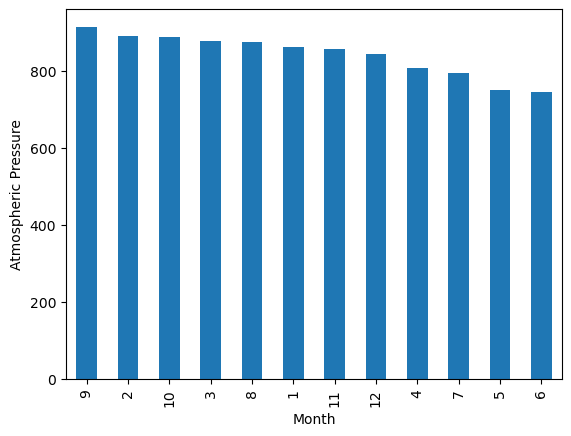

In [140]:
# Plot the average pressure by month
Pressure_plot = ave_pressure.plot.bar(xlabel = "Month", ylabel ="Atmospheric Pressure") 
print(f"Month 9 has the highest pressure and Month 6 has the lowest.")

On visual inspection, there appear to be approx. 685 days between intervals.


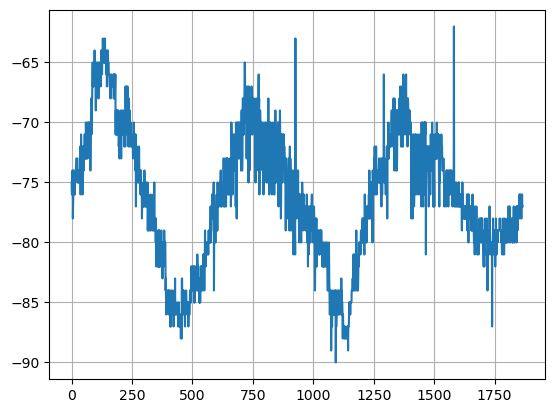

In [130]:
# 5. How many terrestrial (earth) days are there in a Martian year?
answer5 = mars_temps_df['min_temp']
answer5

Plot = answer5.plot.line(grid=True) 
print(f"On visual inspection, there appear to be approx. 685 days between intervals.")

# 5. How many terrestrial (earth) days are there in a Martian year?
A visual assessment of the peaks and troughs in the recorded temperatures (above), indicates: 3 peaks, and two troughs, which can be used to estimate the Earth days in a Martian year.

Between peak 1 and peak 2 appear to be roughly 700 days. Bwetween peak 2 and peak three appear to be  685 days. Between the two whole troughs appears to be approx. 675 days. 
The average of these is 686.67, in keeping with the google result of 687 terrestrial days in a Martian year.


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [136]:
# Write the data to a CSV
mars_temps_df.to_csv('mars_data_df.csv')

In [132]:
browser.quit()